<!--HEADER-->
[*Guia de aulas da disciplina de Modelagem Matemática*](https://github.com/rmsrosa/modelagem_matematica) *do* [*IM-UFRJ*](https://www.im.ufrj.br).

<!--NAVIGATOR-->

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/14.00-Aula14.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
&nbsp;
<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/modmat2019p1?filepath=aulas/14.00-Aula14.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>
&nbsp;
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/14.00-Aula14.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;

[<- Aula 13: Epidemiologia: o modelo SIR em rede](13.00-Aula13.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Aula 15: Exemplos de modelagem com EDP ->](15.00-Aula15.ipynb)

---


# Equação do calor unidimensional

* Vamos considerar, agora, a equação do calor
$$  u_t = \kappa u_{xx}
$$

In [1]:
using DifferentialEquations
using Plots

## Equação do calor

* A solução fundamental da equação do calor unidimensional é
$$ K(t,x) = \frac{1}{\sqrt{4\kappa\pi t}} e^{x^2/(4\kappa t)}.
$$

* Observe que, para cada $t>0$, a função $x\mapsto K(t,x)$ é uma Gaussiana, com desvio padrão aumentando com $t$, ou seja, a solução se espalha, correspondendo a uma difusão na distribuição de $u$.

* A solução com condição inicial $u(0,x) = u_0(x)$ é dada pela convolução
$$ u(t,x) = \int_{-\infty}^\infty K(t,x-\xi)u_0(\xi)\;d\xi = \frac{1}{\sqrt{4\kappa\pi t}} \int_{-\infty}^\infty e^{(x-\xi)^2/(4\kappa t)}u_0(\xi)\;d\xi.
$$

## Simulação

* Vamos simular numericamente a evolução em um intervalo $I=[0,L]$, com condições de contorno de Dirichlet homogêneas, i.e. $u(0)=u(L)=0$.

* Na interpretação de $u$ como temperatura, e assumindo uma escala em graus Celsius, isso corresponde a mantermos a temperatura nos extremos a zero grau.

In [2]:
function Δ(u, h2, ::Val{:dir})
    ddu = zero(u)
    for j = 2:length(u)-1
        ddu[j] = (u[j+1] - 2u[j] + u[j-1])/h2
    end
    return ddu
end

Δ (generic function with 1 method)

In [3]:
function dudt_calor!(dudt, u, p, t)
    ν, h2 = p
    ddu = Δ(u, h2, Val(:dir))
    dudt .= ν * ddu
    return nothing
end

dudt_calor! (generic function with 1 method)

In [4]:
κ = 0.5 # coeficiente de difusão térmica
L = 2π # comprimento do intervalo [0,L]
N = 60 # número de pontos da malha
h = L/(N-1) # comprimento de cada partição na malha
x = range(0.0, L, length=N) # discretização do intervalo [0,L] com N pontos, incluindo os extremos
u₀ = exp.(-(x.-L/2).^2) .- exp(-L^2/4) # condição inicial
p = [κ, h^2] # parâmetros
Tf = 12 # tempo final
τ = 0.1 # intervalos de tempo
tspan = (0.0,Tf) # intervalo de tempo
prob = ODEProblem(dudt_calor!, u₀, tspan, p, saveat = τ)
nothing

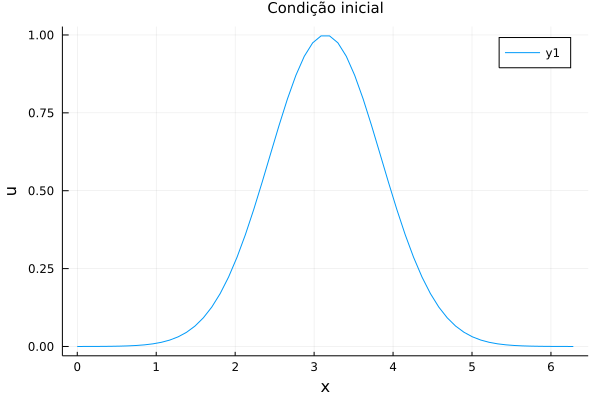

In [5]:
plot(x, u₀, title="Condição inicial", titlefont=10, xlabel="x", ylabel="u")

In [6]:
sol = solve(prob, Tsit5())
sol.retcode

:Success

┌ Info: Saved animation to 
│   fn = /Users/rrosa/Documents/git_repositories/modelagem_matematica/notas_de_aula/img/anim_calor1D_a.gif
└ @ Plots /Users/rrosa/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/Users/rrosa/Documents/git_repositories/modelagem_matematica/notas_de_aula/img/anim_calor1D_a.gif")
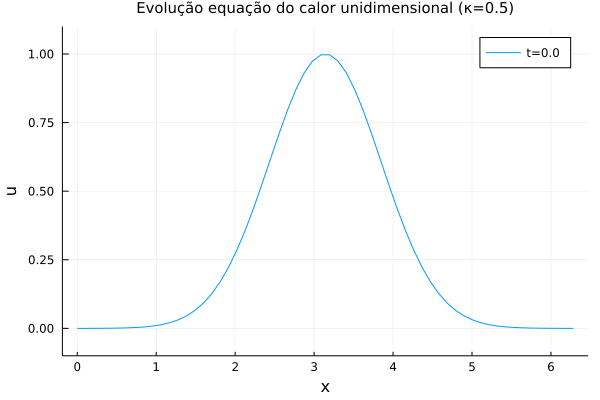

In [7]:
anim = @animate for (t,u) in zip(sol.t, sol.u)
    plot(x, u, ylims=(-0.1, 1.1), label="t=$(round(t,digits=2))",
        title="Evolução equação do calor unidimensional (κ=$κ)", titlefont=10,
        xlabel="x", ylabel="u")
end
gif(anim, joinpath("img", "anim_calor1D_a.gif"), fps = 20)

### Outra simulação

* Aumentando o coeficiente de difusão térmica.

In [8]:
κ = 2.0
p = [κ, h^2] # parâmetros
prob = ODEProblem(dudt_calor!, u₀, tspan, p, saveat = τ)
sol = solve(prob, Tsit5())
sol.retcode

:Success

┌ Info: Saved animation to 
│   fn = /Users/rrosa/Documents/git_repositories/modelagem_matematica/notas_de_aula/img/anim_calor1D_b.gif
└ @ Plots /Users/rrosa/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/Users/rrosa/Documents/git_repositories/modelagem_matematica/notas_de_aula/img/anim_calor1D_b.gif")
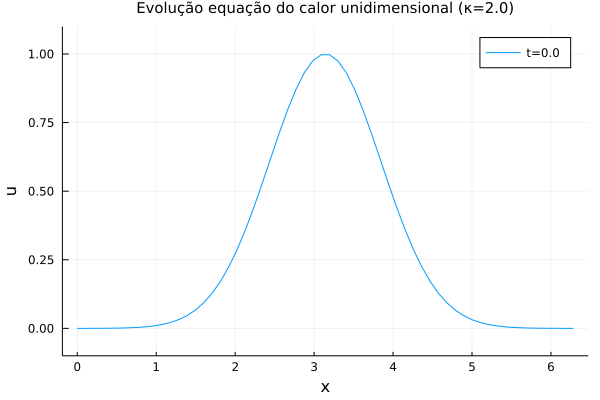

In [9]:
anim = @animate for (t,u) in zip(sol.t, sol.u)
    plot(x, u, ylims=(-0.1, 1.1), label="t=$(round(t,digits=2))",
        title="Evolução equação do calor unidimensional (κ=$κ)", titlefont=10,
        xlabel="x", ylabel="u")
end
gif(anim, joinpath("img", "anim_calor1D_b.gif"), fps = 20)

## Exercicios:

1. Simular a equação de difusão com condições de contorno Neumann.

<!--NAVIGATOR-->

---
[<- Aula 13: Epidemiologia: o modelo SIR em rede](13.00-Aula13.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) | [Aula 15: Exemplos de modelagem com EDP ->](15.00-Aula15.ipynb)

<a href="https://colab.research.google.com/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/14.00-Aula14.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/modmat2019p1?filepath=aulas/14.00-Aula14.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open and Execute in Binder"></a>

<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2019p1/aulas/14.00-Aula14.slides.html"><img align="left" src="https://rmsrosa.github.io/jupyterbookmaker/badges/slides_badge.svg" alt="Open slides" title="Open and View Slides"></a>
&nbsp;